In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

#para la serie del seno:
def seno_taylor(x, tolerancia=1e-6, maxiter=100):
 '''Calcula la serie de Taylor de la función seno'''
 valor_seno = 0
 n = 0
 valores = []  #guarda los valores para luego graficar

 while n < maxiter: #calculamos los terminos
    termino = ((-1)**n / math.factorial(2*n + 1)) * (x**(2*n + 1))
    valor_seno += termino
    valores.append(valor_seno)

    if abs(termino / valor_seno) < tolerancia:
    #si no se cumple la tolerancia, incrementa el contador continuando al siguiente término
        break
    n += 1
 return valor_seno, n+1, valores


In [3]:
#para calcular los errores
def calcular_errores(aprox, real):
    error_relativo = abs((real - aprox) / real)
    error_porcentual = error_relativo * 100
    return error_relativo, error_porcentual

In [4]:
#definimos las variables
x = np.pi / 4
Vreal_seno = np.sin(x)
seno_aprox, n_seno, valores = seno_taylor(x, tolerancia=1e-6)
#calculamos el error relativo y porcentual entre la aproximación y el valor real
error_real_seno, error_por_seno = calcular_errores(seno_aprox, Vreal_seno)

print(f"Seno")
print(f"Valor real: {Vreal_seno}")
print(f"Aproximación de taylor: {seno_aprox}")
print(f"Términos usados: {n_seno}")
print(f"Error relativo: {error_real_seno:.10f}")
print(f"Error porcentual: {error_por_seno:.10f}%\n")

Seno
Valor real: 0.7071067811865475
Aproximación de taylor: 0.7071067829368671
Términos usados: 5
Error relativo: 0.0000000025
Error porcentual: 0.0000002475%



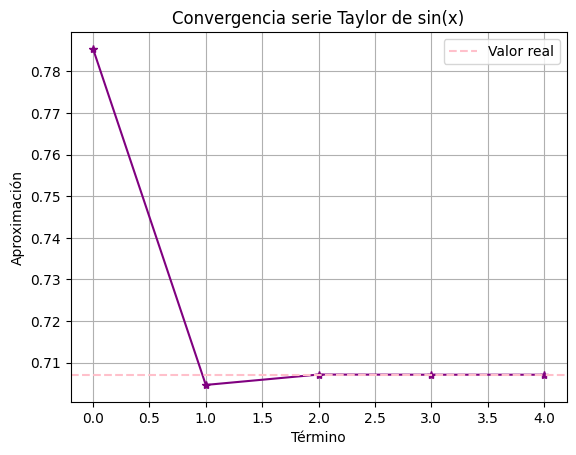

In [ ]:
#graficamos
plt.plot(valores, color ='purple', marker='*')
plt.axhline( y=Vreal_seno, color='pink', linestyle='--', label='Valor real') #linea en el valor real del seno
plt.title('Convergencia serie Taylor de sin(x)')
plt.xlabel('Término')
plt.ylabel('Aproximación')
plt.grid(True)
plt.legend()
plt.show()

#la serie converge rapidamente con pocos términos, en especial si x es cercano a 0

In [ ]:
# para la serie de ln(x+1), utilizando los pasos anteriores:
def ln_taylor(x, tolerancia=1e-6, max_iter=100):
    '''Calcula la serie de Taylor de la función ln(x+1)'''
    suma = 0
    n = 1
    valores = []  # guarda los valores para luego graficar

    while n <= max_iter:  # calculamos los términos
        termino = ((-1)**(n-1) / n) * (x**n)
        suma += termino
        valores.append(suma)

        if abs(termino / suma) < tolerancia:
            # si se cumple la tolerancia, se rompe el ciclo
            break
        n += 1
    return suma, n, valores


In [ ]:
#definimos las variables
x_ln = 0.5
real_ln = np.log(1 + x_ln)
ln_aprox, N, valores_ln = ln_taylor(x_ln)
error_real_ln, error_por_ln = calcular_errores(ln_aprox, real_ln)

print(f"Logaritmo natural")
print(f"Valor real: {real_ln}")
print(f"Aproximación Taylor: {ln_aprox}")
print(f"Términos usados: {N}")
print(f"Error relativo: {error_real_ln:.10f}")
print(f"Error porcentual: {error_por_ln:.10f}%")

Logaritmo natural
Valor real: 0.4054651081081644
Aproximación Taylor: 0.4054650400311227
Términos usados: 18
Error relativo: 0.0000001679
Error porcentual: 0.0000167899%


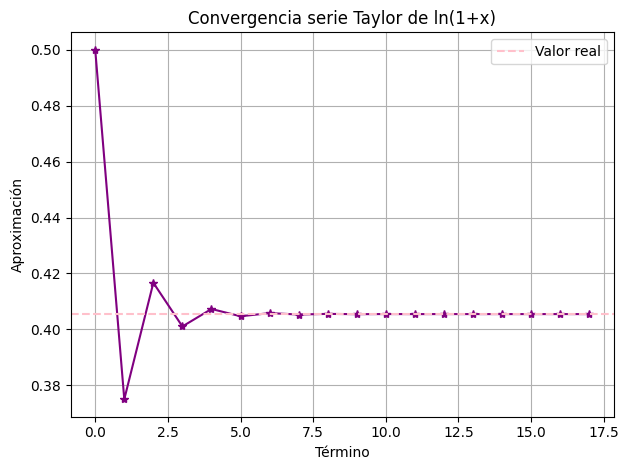

In [ ]:
#graficamos
plt.plot(valores_ln, marker='*', color='purple')
plt.axhline(y=real_ln, color='pink', linestyle='--', label='Valor real')
plt.title('Convergencia serie Taylor de ln(1+x)')
plt.xlabel('Término')
plt.ylabel('Aproximación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#la serie converge con pocos términos, aunque más lento en comparación a la serie del seno (debido a que no hay factoriales presentes)

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [ ]:
#calculamos el coeficiente binomial generalizado para luego reemplazar 0.5
def coef_binomial(alpha, n):
    '''Calcula el coeficiente binomial generalizado
    Parametros:
    alpha = coeficiente entero
    n = número de términos'''
    coef = 1
    for k in range(n):
        coef *= (alpha - k)
    return coef / math.factorial(n)

In [ ]:
#definimos la función para la aproximación de la serie de Taylor para la función sqrt(1+x)
def taylor_sqrt(x, tolerancia=1e-6, maxiter=100):
    '''Calcula la aproximación de la serie de Taylor para la función sqrt(1+x)'''
    valor_aprox = 0
    valores = []
    n = 0
    while n < maxiter:
        termino = coef_binomial(0.5, n) * (x ** n)
        valor_aprox += termino
        valores.append(valor_aprox)
        if abs(termino) < tolerancia:
            return valor_aprox, n + 1, valores
        n += 1
    return valor_aprox, n, valores

In [ ]:
# para calcular los errores
x = 0.5
valor_real = np.sqrt(1 + x)

aproximacion, num_terminos, valores_aproximacion = taylor_sqrt(x)
error_relativo, error_porcentual = calcular_errores(aproximacion, valor_real) #para el item b

print("Resultado de la serie de Taylor para sqrt(1 + x):\n")
print(f"Valor real: {valor_real:.10f}")
print(f"Aproximación de Taylor: {aproximacion:.10f}")
print(f"Términos usados: {num_terminos}")
print(f"Error relativo: {error_relativo:.10f}")
print(f"Error porcentual: {error_porcentual:.10f}%")

Resultado de la serie de Taylor para sqrt(1 + x):

Valor real: 1.2247448714
Aproximación de Taylor: 1.2247451045
Términos usados: 14
Error relativo: 0.0000001904
Error porcentual: 0.0000190365%


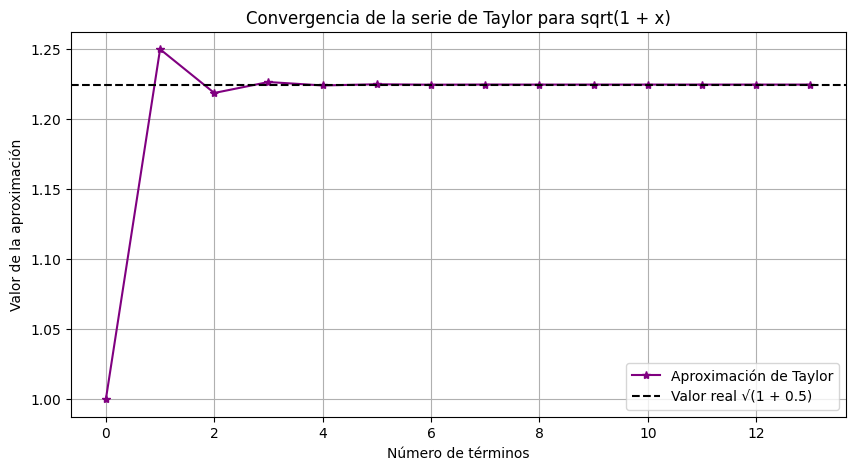

In [ ]:
#para el item c, graficamos la convergencia (valores vs. número de términos)
plt.figure(figsize=(10, 5))
plt.plot(valores_aproximacion, color ='purple', marker='*', label='Aproximación de Taylor')
plt.axhline(y=valor_real, color='black', linestyle='--', label='Valor real √(1 + 0.5)')
plt.title('Convergencia de la serie de Taylor para sqrt(1 + x)')
plt.xlabel('Número de términos')
plt.ylabel('Valor de la aproximación')
plt.legend()
plt.grid(True)
plt.show()

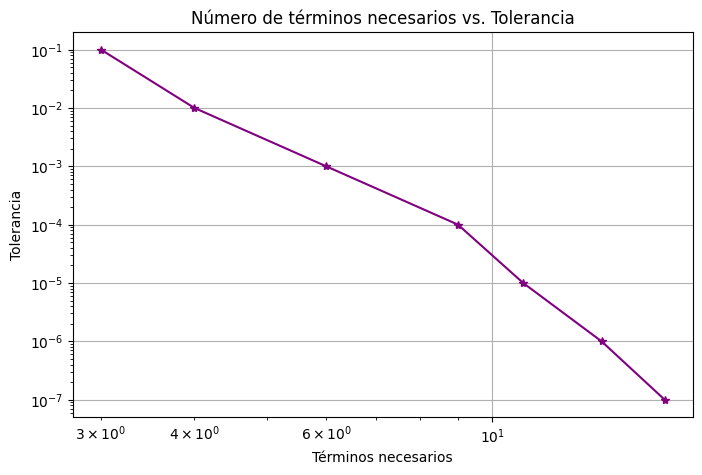

In [ ]:
#para el item d, evaluamos con diferentes tolerancias

tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7] #definimos varias tolerancias
terminos_necesarios = [] #para ver el número de términos

for tol in tolerancias:
    #llamamos a la función con las tolerancias
    aprox_tem, num_term, valores_aproximacion = taylor_sqrt(x, tolerancia=tol)
    #guardamos cuántos términos necesitó esa tolerancia
    terminos_necesarios.append(num_term)

#para el item d, gráfico de evolución de términos vs tolerancia
plt.figure(figsize=(8, 5))
plt.loglog(terminos_necesarios, tolerancias, color='purple', marker='*')
plt.title('Número de términos necesarios vs. Tolerancia')
plt.ylabel('Tolerancia')
plt.xlabel('Términos necesarios')
plt.grid(True)
plt.show()